In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
from scope.utils import read_parquet
from scope.utils import read_hdf

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [3]:
field_list = [487, 563, 777]
path_to_dnn_preds = "/Users/bhealy/scope/revised_preds_dnn" #change to appropriate filepath
path_to_xgb_preds = "/Users/bhealy/scope/revised_preds_xgb" #change to appropriate filepath

fields_preds_dnn = []
fields_preds_xgb = []

for field in field_list:
    field_preds_dnn = read_parquet(f'{path_to_dnn_preds}/field_{field}/field_{field}.parquet') 
    field_preds_xgb = read_parquet(f'{path_to_xgb_preds}/field_{field}/field_{field}.parquet')

    fields_preds_dnn.append(field_preds_dnn)
    fields_preds_xgb.append(field_preds_xgb)

field_preds_dnn = pd.concat(fields_preds_dnn)
field_preds_xgb = pd.concat(fields_preds_xgb)

In [4]:
training_set = read_parquet('/Users/bhealy/scope/fritzDownload/training_set.parquet') #change to appropriate filepath

In [5]:
n_lightcurves = len(training_set)

classifications = [] # create a list of the 44 classifications in alphabetical order
for entry in field_preds_dnn.columns:
    if '_dnn' in entry:
        classifications.append(entry.replace('_dnn',''))
classifications.sort()
classifications

['agn',
 'bis',
 'blend',
 'blher',
 'blyr',
 'bogus',
 'bright',
 'ceph',
 'ceph2',
 'cv',
 'dip',
 'dp',
 'dscu',
 'e',
 'ea',
 'eb',
 'el',
 'emsms',
 'ew',
 'ext',
 'fla',
 'hp',
 'i',
 'longt',
 'lpv',
 'mir',
 'mp',
 'osarg',
 'pnp',
 'puls',
 'rrab',
 'rrblz',
 'rrc',
 'rrd',
 'rrlyr',
 'rscvn',
 'saw',
 'sin',
 'srv',
 'vnv',
 'wp',
 'wuma',
 'wvir',
 'yso']

In [6]:
train_cols = [] #list of training set column names
for column in training_set.columns:
    train_cols.append(column)
    
while len(train_cols) > 53: #loop to remove column names that don't correspond to classifications (e.g. ID column, features)
    train_cols.pop(0)

train_cols

['variable',
 'YSO',
 'periodic',
 'pulsator',
 'RR Lyrae',
 'Cepheid',
 'multi periodic',
 'sinusoidal',
 'non-variable',
 'bogus',
 'bright star',
 'long timescale',
 'irregular',
 'blend',
 'extended',
 'eclipsing',
 'EW',
 'flaring',
 'ccd artifact',
 'binary star',
 'detached eclipsing MS-MS',
 'W UMa',
 'RR Lyrae ab',
 'RR Lyrae c',
 'Delta Scu',
 'RR Lyrae d',
 'Cepheid type-II',
 'RS CVn',
 'EB',
 'Beta Lyr',
 'sawtooth',
 'RR Lyrae Blazhko',
 'EA',
 'dipping',
 'wrong period',
 'double period',
 'AGN',
 'RV Tau',
 'LPV',
 'Mira',
 'half period',
 'SRV',
 'W Virginis',
 'compact binary',
 'eclipsing WD+dM (NN Ser)',
 'F',
 'O',
 'BL Her',
 'OSARG',
 'eclipsing sdB+dM (HW Vir)',
 'ellipsoidal',
 'Redback pulsar',
 'CV']

In [7]:
counts_train = {} #dictionary w classifications as keys and num of sources > certain probability threshold as values
threshold = 0.7 #enter chosen threshold for positive classification

for column in train_cols:
    count = np.count_nonzero(training_set[column] > threshold)
    counts_train[column] = count
    
counts_train

{'variable': 125056,
 'YSO': 4108,
 'periodic': 107248,
 'pulsator': 26603,
 'RR Lyrae': 14917,
 'Cepheid': 1573,
 'multi periodic': 257,
 'sinusoidal': 2645,
 'non-variable': 45212,
 'bogus': 1640,
 'bright star': 106,
 'long timescale': 3961,
 'irregular': 5970,
 'blend': 360,
 'extended': 154,
 'eclipsing': 75049,
 'EW': 55251,
 'flaring': 4633,
 'ccd artifact': 18,
 'binary star': 66607,
 'detached eclipsing MS-MS': 5199,
 'W UMa': 55253,
 'RR Lyrae ab': 4293,
 'RR Lyrae c': 6251,
 'Delta Scu': 6475,
 'RR Lyrae d': 539,
 'Cepheid type-II': 281,
 'RS CVn': 1593,
 'EB': 3130,
 'Beta Lyr': 3017,
 'sawtooth': 1314,
 'RR Lyrae Blazhko': 85,
 'EA': 2073,
 'dipping': 64,
 'wrong period': 1694,
 'double period': 238,
 'AGN': 596,
 'RV Tau': 9,
 'LPV': 3359,
 'Mira': 248,
 'half period': 237,
 'SRV': 950,
 'W Virginis': 77,
 'compact binary': 18,
 'eclipsing WD+dM (NN Ser)': 10,
 'F': 19,
 'O': 6,
 'BL Her': 95,
 'OSARG': 2061,
 'eclipsing sdB+dM (HW Vir)': 7,
 'ellipsoidal': 931,
 'Redback

In [8]:
#this cell creates a dataframe from counts_train and reformats it to include only the 44 classifications with their standard abbreviations
counts_train_table = pd.DataFrame.from_dict(counts_train, orient = 'index', columns = ['count'])
counts_train_table = counts_train_table.drop(['non-variable', 'ccd artifact', 'RV Tau', 'compact binary', 'eclipsing WD+dM (NN Ser)', 'eclipsing sdB+dM (HW Vir)', 'F', 'O', 'Redback pulsar'])
counts_train_table = counts_train_table.reset_index(names = 'classification')
counts_train_table['classification'] = counts_train_table['classification'].map(lambda name: name.lower())
counts_train_table = counts_train_table.sort_values('classification').reset_index(drop=True)
counts_train_table = counts_train_table.replace('binary star', 'bis').replace('beta lyr', 'blyr').replace('bl her', 'blher').replace('bright star', 'bright').replace('cepheid', 'ceph').replace('cepheid type-ii', 'ceph2').replace('delta scu', 'dscu').replace('detached eclipsing ms-ms', 'emsms').replace('dipping', 'dip').replace('double period', 'dp').replace('eclipsing', 'e').replace('ellipsoidal', 'el').replace('extended', 'ext').replace('flaring', 'fla').replace('half period', 'hp').replace('irregular', 'i').replace('long timescale', 'longt').replace('mira', 'mir').replace('multi periodic', 'mp').replace('periodic', 'pnp').replace('pulsator', 'puls').replace('rr lyrae ab', 'rrab').replace('rr lyrae blazhko', 'rrblz').replace('rr lyrae c', 'rrc').replace('rr lyrae d', 'rrd').replace('rr lyrae', 'rrlyr').replace('rs cvn', 'rscvn').replace('sawtooth', 'saw').replace('sinusoidal', 'sin').replace('variable', 'vnv').replace('wrong period', 'wp').replace('w uma', 'wuma').replace('w virginis', 'wvir')
counts_train_table = counts_train_table.sort_values('classification').reset_index(drop=True)
counts_train_table

,classification,count
0,agn,596
1,bis,66607
2,blend,360
3,blher,95
4,blyr,3017
5,bogus,1640
6,bright,106
7,ceph,1573
8,ceph2,281
9,cv,4435


### Comparing DNN, XGB predictions 

In [9]:
def hist_plot(classif): #function to make histogram of dnn vs xgb predictions for a particular classification
    classif_dnn = field_preds_dnn[classif + '_dnn']
    classif_xgb = field_preds_xgb[classif + '_xgb']
    plot = plt.hist(classif_dnn, bins = 55, range = (0, 1.1), alpha = 0.5, label = 'dnn') + plt.hist(classif_xgb, bins = 55, range = (0, 1.1), alpha = 0.5, label = 'xgb', log=True)
    plt.legend()
    plt.xlabel(classif + ' Classification Probability')
    plt.ylabel('Number of Sources')

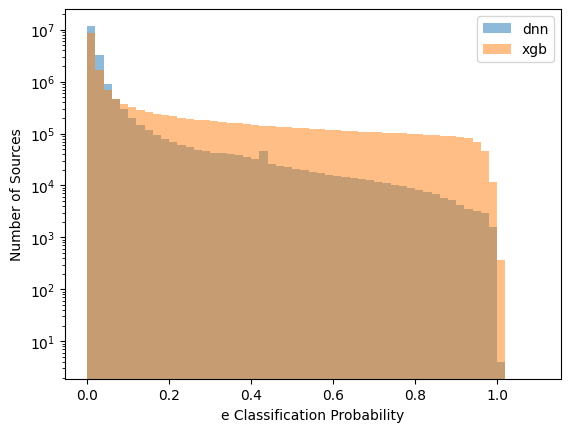

In [10]:
hist_plot('e') #input whichever classification you want
#adjust plot as desired, for example plt.yscale('log') to get logarithmic scale

In [11]:
#new dataframe containing dnn AND xgb preds
dnn_xgb_preds = pd.merge(field_preds_dnn, field_preds_xgb, on = ["_id", "Gaia_EDR3___id", "AllWISE___id", "PS1_DR1___id", "ra", "dec", "period", "field", "ccd", "quad", "filter"])

In [12]:
#function to make a scatter plot comparing dnn and xgb predictions, with agreement stat
def class_compare(classif):
    table = pd.DataFrame(columns = ['dnn', 'xgb'])
    table['dnn'] = dnn_xgb_preds[classif + '_dnn']
    table['xgb'] = dnn_xgb_preds[classif + '_xgb']
    plt.scatter(table['dnn'], table['xgb'], alpha = 0.01)
    plt.xlabel('dnn probability')
    plt.ylabel('xgb probability')
    plt.plot([threshold, threshold], [0,1], color = 'orange')
    plt.plot([0,1], [threshold, threshold], color = 'orange')
    table['new'] = np.where(((table['dnn'] < threshold) & (table['xgb'] < threshold)) | ((table['dnn'] >= threshold) & (table['xgb'] >= threshold)), 'Agree', 'Disagree')
    
    count_agree = 0
    for row in table['new']:
        if row == 'Agree':
            count_agree += 1
    agreement = np.round(count_agree / len(dnn_xgb_preds), 2)
    
    plt.suptitle(classif + ' predictions, DNN vs. XGB')
    plt.title(f'fractional agreement = {agreement}')
    plt.tight_layout()

In [13]:
#visually reworked function to compare dnn and xgb preds in a 2d histogram/heat map
def heatmap(classif):
    table = pd.DataFrame(columns = ['dnn', 'xgb'])
    table['dnn'] = dnn_xgb_preds[classif + '_dnn']
    table['xgb'] = dnn_xgb_preds[classif + '_xgb']
    table['new'] = np.where(((table['dnn'] <= threshold) & (table['xgb'] <= threshold)) | ((table['dnn'] > threshold) & (table['xgb'] > threshold)), 'Agree', 'Disagree')

    fig = plt.figure(figsize=(6,4.5))    
    heat_plot = plt.hist2d(table['dnn'], table['xgb'], bins = [np.arange(0,1.05,1/20), np.arange(0,1.05,1/20)], norm = mpl.colors.LogNorm(vmin=1, vmax=len(dnn_xgb_preds)/100), cmap = mpl.cm.Oranges)

    plt.xlabel('DNN probability', fontsize=16)
    plt.ylabel('XGB probability', fontsize=16)
    plt.text(.05,.9, classif, fontsize=18)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.tight_layout()
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Number of light curves', size=16)
    
    count_agree = 0
    for row in table['new']:
        if row == 'Agree':
            count_agree += 1
    agreement = np.round(count_agree / len(dnn_xgb_preds), 2)
    
    return fig, agreement

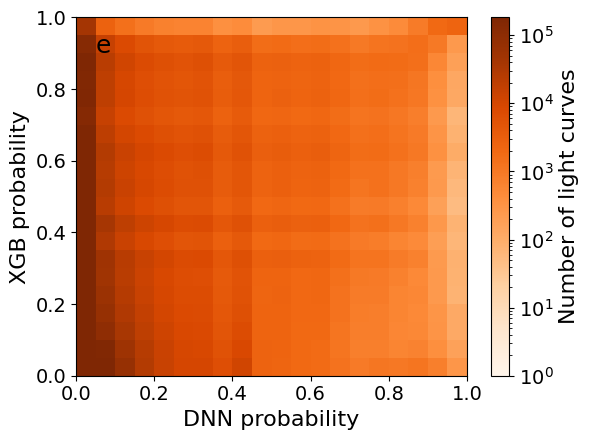

In [14]:
fig, agreement = heatmap('e')

In [15]:
# DNN/XGB comparison 1: uniform thresh 0.7
thresh = 0.7
agree_fracs = []
count = 0
for cls in classifications:
    excluded_classes = ['bogus', 'rrd', 'blend', 'ext', 'wp', 'el' , 'mp' ,'dp', 'hp', 'bright', 'blher', 'rrblz', 'dip']
    if cls not in excluded_classes:
        prob_dnn, prob_xgb = thresh, thresh

        count += 1
        agree_frac = np.sum(((dnn_xgb_preds[f'{cls}_dnn'] > prob_dnn) & (dnn_xgb_preds[f'{cls}_xgb'] > prob_xgb)) | ((dnn_xgb_preds[f'{cls}_dnn'] <= prob_dnn) & (dnn_xgb_preds[f'{cls}_xgb'] <= prob_xgb))) / len(dnn_xgb_preds)
        print(cls, prob_dnn, prob_xgb)
        print(agree_frac)
        agree_fracs += [agree_frac]


agn 0.7 0.7
0.9999987901719287
bis 0.7 0.7
0.9863015566857793
blyr 0.7 0.7
0.9999847121725531
ceph 0.7 0.7
0.9999905413441695
ceph2 0.7 0.7
0.9999998350234448
cv 0.7 0.7
0.9999679945482948
dscu 0.7 0.7
0.9998163810940828
e 0.7 0.7
0.9320763476302383
ea 0.7 0.7
1.0
eb 0.7 0.7
0.9999983502344482
emsms 0.7 0.7
0.9999920811253513
ew 0.7 0.7
0.9944861535727157
fla 0.7 0.7
0.9994148831509554
i 0.7 0.7
0.9994348453141324
longt 0.7 0.7
0.9994446889152583
lpv 0.7 0.7
0.9976814744856608
mir 0.7 0.7
0.9999683794935902
osarg 0.7 0.7
0.9984333276398091
pnp 0.7 0.7
0.8861270774810192
puls 0.7 0.7
0.997175986320584
rrab 0.7 0.7
0.9999538065645491
rrc 0.7 0.7
0.9999931809690525
rrlyr 0.7 0.7
0.9999379138230666
rscvn 0.7 0.7
0.9999984602188183
saw 0.7 0.7
1.0
sin 0.7 0.7
0.9999687644388856
srv 0.7 0.7
0.9999104177305363
vnv 0.7 0.7
0.8567748337283788
wuma 0.7 0.7
0.9915493509217405
wvir 0.7 0.7
1.0
yso 0.7 0.7
0.9996253382431822


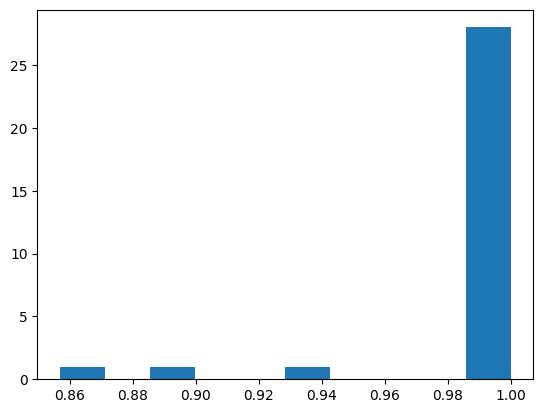

In [16]:
plt.hist(agree_fracs)
plt.show()

In [17]:
np.min(agree_fracs), np.mean(agree_fracs), np.max(agree_fracs)

(0.8567748337283788, 0.9883227571949106, 1.0)

In [18]:
# DNN/XGB comparison 2: decreasing threshold until 1000 positive
thresh = 0.7
topn = 1000
agree_fracs = []
count = 0
for cls in classifications:
    excluded_classes = ['bogus', 'rrd', 'blend', 'ext', 'wp', 'el' , 'mp' ,'dp', 'hp', 'bright', 'blher', 'rrblz', 'dip']
    if cls not in excluded_classes:
        prob_dnn, prob_xgb = thresh, thresh
        while (np.sum(dnn_xgb_preds[f'{cls}_dnn'] > prob_dnn)) < topn:
            prob_dnn -= 0.01
        while (np.sum(dnn_xgb_preds[f'{cls}_xgb'] > prob_xgb)) < topn:
            prob_xgb -= 0.01
    
        if (prob_dnn <= 0) | (prob_xgb <= 0):
            print(cls)
            continue
        else:
            count += 1
            agree_frac = np.sum(((dnn_xgb_preds[f'{cls}_dnn'] > prob_dnn) & (dnn_xgb_preds[f'{cls}_xgb'] > prob_xgb)) | ((dnn_xgb_preds[f'{cls}_dnn'] <= prob_dnn) & (dnn_xgb_preds[f'{cls}_xgb'] <= prob_xgb))) / len(dnn_xgb_preds)
            print(cls, prob_dnn, prob_xgb)
            print(agree_frac)
            agree_fracs += [agree_frac]


agn 0.4099999999999997 0.3099999999999996
0.9998818217943048
bis 0.7 0.7
0.9863015566857793
blyr 0.36999999999999966 0.22999999999999954
0.9999474274710821
ceph 0.20999999999999952 0.09999999999999946
0.9999131123476043
ceph2 0.02999999999999947 0.1799999999999995
0.9998900156298789
cv 0.6099999999999999 0.06999999999999948
0.9999214711597335
dscu 0.7 0.7
0.9998163810940828
e 0.7 0.7
0.9320763476302383
ea 0.46999999999999975 0.2699999999999996
0.9999494071897442
eb 0.2699999999999996 0.2799999999999996
0.9999558962675814
emsms 0.22999999999999954 0.09999999999999946
0.9999463276273809
ew 0.7 0.7
0.9944861535727157
fla 0.7 0.7
0.9994148831509554
i 0.7 0.7
0.9994348453141324
longt 0.7 0.7
0.9994446889152583
lpv 0.7 0.7
0.9976814744856608
mir 0.7 0.7
0.9999683794935902
osarg 0.7 0.7
0.9984333276398091
pnp 0.7 0.7
0.8861270774810192
puls 0.7 0.7
0.997175986320584
rrab 0.6799999999999999 0.4399999999999997
0.9998844064270026
rrc 0.06999999999999948 0.1999999999999995
0.9998926002625766
rrly

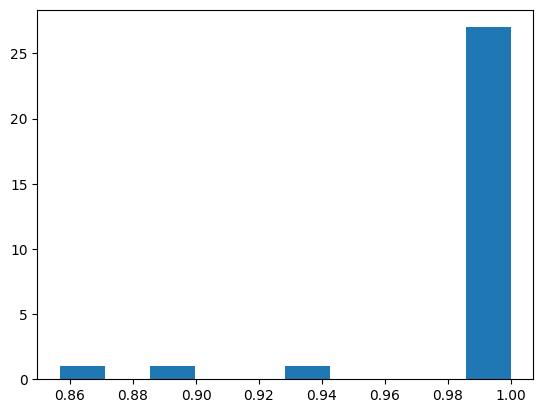

In [19]:
plt.hist(agree_fracs)
plt.show()

In [20]:
np.min(agree_fracs), np.mean(agree_fracs), np.max(agree_fracs)

(0.8567748337283788, 0.9879011180387819, 0.9999683794935902)

In [21]:
#DNN/XGB comparison 3: weighted topn
agree_fracs = []
cls_dict = {}
count = 0
for cls in classifications:
    excluded_classes = ['bogus', 'rrd', 'blend', 'ext', 'wp', 'el' , 'mp' ,'dp', 'hp', 'bright', 'blher', 'rrblz', 'dip']
    if cls not in excluded_classes:
        topn = int(np.floor(np.mean([np.sum(dnn_xgb_preds[f'{cls}_dnn']), np.sum(dnn_xgb_preds[f'{cls}_xgb'])])))
        dnn_preds = dnn_xgb_preds[f'{cls}_dnn'].sort_values(ascending=False).iloc[:topn]
        xgb_preds = dnn_xgb_preds[f'{cls}_xgb'].sort_values(ascending=False).iloc[:topn]
        mrg = pd.merge(dnn_preds, xgb_preds, left_index=True, right_index=True)
        cls_dict[cls] = topn
        n_agree = len(mrg)
        print(cls, n_agree / topn)
        agree_fracs += [n_agree / topn]


agn 0.038929440389294405
bis 0.4636055309157318
blyr 0.3692664989355525
ceph 0.23705583756345178
ceph2 0.5869749188809962
cv 0.3418759610456176
dscu 0.02246701935311056
e 0.255063258533213
ea 0.24220227863627333
eb 0.306978343073221
emsms 0.4644412191582003
ew 0.30325396578296
fla 0.6596440467077866
i 0.5154465354073752
longt 0.09403290952864164
lpv 0.4557134474646441
mir 0.8456140350877193
osarg 0.6479543488113386
pnp 0.4851707397672452
puls 0.5426584006789918
rrab 0.513284798355337
rrc 0.07929515418502203
rrlyr 0.11880061575530419
rscvn 0.3517857142857143
saw 0.25216124332200096
sin 0.3860573320359248
srv 0.5142895478330873
vnv 0.5261158059450963
wuma 0.39616931437791497
wvir 0.013419216317767043
yso 0.26377531152647976


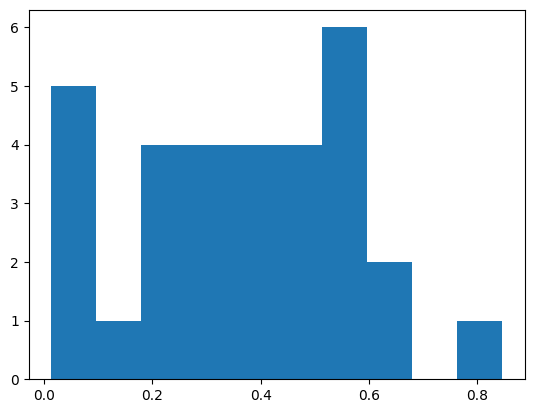

In [22]:
plt.hist(agree_fracs)
plt.show()

In [23]:
np.min(agree_fracs), np.mean(agree_fracs), np.max(agree_fracs)

(0.013419216317767043, 0.3643065416019681, 0.8456140350877193)

### Testing hierarchical classifications (vnv -> pnp, i)

In [24]:
np.sum((dnn_xgb_preds['vnv_dnn'] > 0.7) & (dnn_xgb_preds['pnp_dnn'] > 0.7)) / np.sum(dnn_xgb_preds['pnp_dnn'] > 0.7)

0.703676632001486

In [25]:
np.sum((dnn_xgb_preds['vnv_xgb'] > 0.7) & (dnn_xgb_preds['pnp_xgb'] > 0.7)) / np.sum(dnn_xgb_preds['pnp_xgb'] > 0.7)

0.9350237073306785

In [26]:
np.sum((dnn_xgb_preds['vnv_dnn'] > 0.7) & (dnn_xgb_preds['i_dnn'] > 0.7)) / np.sum(dnn_xgb_preds['i_dnn'] > 0.7)

0.9369574378423936

In [27]:
np.sum((dnn_xgb_preds['vnv_xgb'] > 0.7) & (dnn_xgb_preds['i_xgb'] > 0.7)) / np.sum(dnn_xgb_preds['i_xgb'] > 0.7)

0.9214421252371916

### Plotting training results

In [28]:
import json
import glob

First, run `scope.py assemble_training_stats` for DNN and XGB algorithms to group training stats together. Then, continue with the cells below.

In [29]:
# DNN training scores
dnn_stats_train = {} #dictionary with classifications as keys and dnn CM stats as values 
for classif in classifications:
    file = glob.glob(f'/Users/bhealy/scope/dnn_revised_stats_train/{classif}.*stats.json') #change to appropriate filepath
    with open(file[0]) as classif_stats:
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        dnn_stats_train.update(new)

In [30]:
# DNN test scores
dnn_stats = {} #dictionary with classifications as keys and dnn CM stats as values 
for classif in classifications:
    file = glob.glob(f'/Users/bhealy/scope/dnn_revised_stats/{classif}.*stats.json') #change to appropriate filepath
    with open(file[0]) as classif_stats:
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        dnn_stats.update(new)

In [31]:
# XGB training scores
xgb_stats_train = {} #dictionary with classifications as keys and xgb CM stats as values 
for classif in classifications:  
    file = glob.glob(f'/Users/bhealy/scope/xgb_revised_stats_train/{classif}.*stats.json') #change to appropriate filepath
    with open(file[0]) as classif_stats:
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        xgb_stats_train.update(new)

In [32]:
# XGB test scores
xgb_stats = {} #dictionary with classifications as keys and xgb CM stats as values 
for classif in classifications:
    file = glob.glob(f'/Users/bhealy/scope/xgb_revised_stats/{classif}.*stats.json') #change to appropriate filepath
    with open(file[0]) as classif_stats:
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        xgb_stats.update(new)

In [33]:
#dataframes of training confusion matrix stats (accuracy, precision, recall, f1 score, ROC area)
stats_dnn_train = pd.DataFrame.from_dict(dnn_stats_train, orient = 'index')
stats_xgb_train = pd.DataFrame.from_dict(xgb_stats_train, orient = 'index')

#dataframes of test confusion matrix stats (accuracy, precision, recall, f1 score, ROC area)
stats_dnn = pd.DataFrame.from_dict(dnn_stats, orient = 'index')
stats_xgb = pd.DataFrame.from_dict(xgb_stats, orient = 'index')

In [34]:
# If DNN and XGB fail to identify any true positives, drop from stats
drop_list = []
for cls in stats_dnn.index:
    dnn_rec = stats_dnn.loc[cls, 'recall']
    if dnn_rec == 0:
        try:
            xgb_rec = stats_xgb.loc[cls, 'recall']
            if xgb_rec == 0:
                drop_list.append(cls)
        except KeyError:
            continue     

In [35]:
target_scores = ['precision', 'recall']

#dataframe of dnn training precision and recall, sorted by num pos examples in training set
dnn_prec_rec_train = stats_dnn_train[target_scores]
dnn_prec_rec_train = dnn_prec_rec_train.drop(drop_list) 

#dataframe of dnn test precision and recall, sorted by num pos examples in training set
dnn_prec_rec = stats_dnn[target_scores]
dnn_prec_rec = dnn_prec_rec.drop(drop_list) 

#dataframe of xgb training precision and recall, sorted by num pos examples in training set
xgb_prec_rec_train = stats_xgb_train[target_scores]
xgb_prec_rec_train = xgb_prec_rec_train.drop(drop_list) 

#dataframe of xgb test precision and recall, sorted by num pos examples in training set
xgb_prec_rec = stats_xgb[target_scores]
xgb_prec_rec = xgb_prec_rec.drop(drop_list)

In [36]:
# Inner-joined training set precision/recall scores
mrg_prec_rec_train = dnn_prec_rec_train.join(xgb_prec_rec_train, how='inner', lsuffix='_dnn', rsuffix='_xgb')
mrg_prec_rec_train = mrg_prec_rec_train.reset_index().rename({'index': 'classification'}, axis=1)
mrg_prec_rec_train = pd.merge(counts_train_table, mrg_prec_rec_train, on='classification')
mrg_prec_rec_train.set_index('classification', inplace=True)
mrg_prec_rec_train.sort_values('count', ascending=False, inplace=True)


In [37]:
# Inner-joined test set precision/recall scores
mrg_prec_rec = dnn_prec_rec.join(xgb_prec_rec, how='inner', lsuffix='_dnn', rsuffix='_xgb')
mrg_prec_rec = mrg_prec_rec.reset_index().rename({'index': 'classification'}, axis=1)
mrg_prec_rec = pd.merge(counts_train_table, mrg_prec_rec, on='classification')
mrg_prec_rec.set_index('classification', inplace=True)
mrg_prec_rec.sort_values('count', ascending=False, inplace=True)


In [38]:
# Outer-joined train set precision/recall scores
resultsTable_train = dnn_prec_rec_train.join(xgb_prec_rec_train, how='outer', lsuffix='_dnn', rsuffix='_xgb')
resultsTable_train = resultsTable_train.reset_index().rename({'index': 'classification'}, axis=1)
resultsTable_train = pd.merge(counts_train_table, resultsTable_train, on='classification')
resultsTable_train.sort_values('count', ascending=False, inplace=True)
resultsTable_train.set_index('classification', inplace=True)


In [39]:
# Outer-joined test set precision/recall scores
resultsTable = dnn_prec_rec.join(xgb_prec_rec, how='outer', lsuffix='_dnn', rsuffix='_xgb')
resultsTable = resultsTable.reset_index().rename({'index': 'classification'}, axis=1)
resultsTable = pd.merge(counts_train_table, resultsTable, on='classification')
resultsTable.sort_values('count', ascending=False, inplace=True)
resultsTable.set_index('classification', inplace=True)

classifications_subset = resultsTable.index

resultsTable

,count,precision_dnn,recall_dnn,precision_xgb,recall_xgb
classification,,,,,
vnv,125056,0.971549,0.981691,0.976194,0.981290
pnp,107248,0.949666,0.962333,0.955294,0.959421
e,75049,0.896770,0.928686,0.921273,0.940995
bis,66607,0.906181,0.937282,0.947415,0.971298
wuma,55253,0.904410,0.918800,0.951388,0.959217
ew,55251,0.860377,0.910571,0.897445,0.912217
puls,26603,0.895833,0.878227,0.962234,0.942582
rrlyr,14917,0.905944,0.817379,0.949200,0.926001
dscu,6475,0.831034,0.717262,0.978626,0.953869


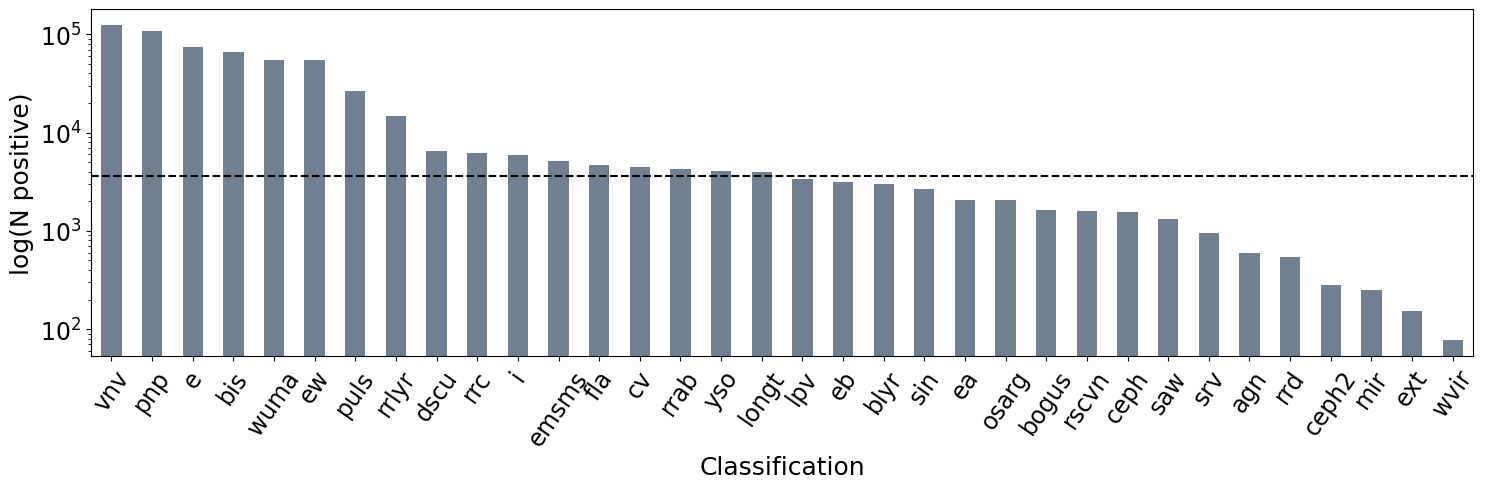

In [40]:
# Plot number of positive training examples
countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.bar(x = 'classification', y = 'count', figsize = (15,5), legend = None, ax=ax, color='slategray')
plt.yscale('log')
plt.ylabel('log(N positive)', fontsize=18)
plt.xlabel('Classification', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.axhline(np.median(resultsTable['count']), linestyle='--', color='black')
plt.tight_layout()

In [41]:
feature_importances = {} #dictionary with classifications as keys and xgb feature importance dicts as values
for classif in classifications:
    file = glob.glob(f'/Users/bhealy/scope/revised_xgb_feature_importance/{classif}.*impvars.json') #change to appropriate filepath
    with open(file[0]) as importance:
        importance = importance.read()
        importance = json.loads(importance)
        new = {classif: importance}
        feature_importances.update(new)

In [42]:
most_important_features = []
for classif in classifications_subset:
    importance = feature_importances[classif]
    features = [x for x in importance.keys()]
    f_scores = [x for x in importance.values()]
    max_f_index = np.argmax(f_scores)
    most_important_feature = features[max_f_index]
    most_important_features.append(most_important_feature)
    
counter = Counter(most_important_features)
most_common = counter.most_common()[::-1]

names = [x[0] for x in most_common]
frequencies = [x[1] for x in most_common]

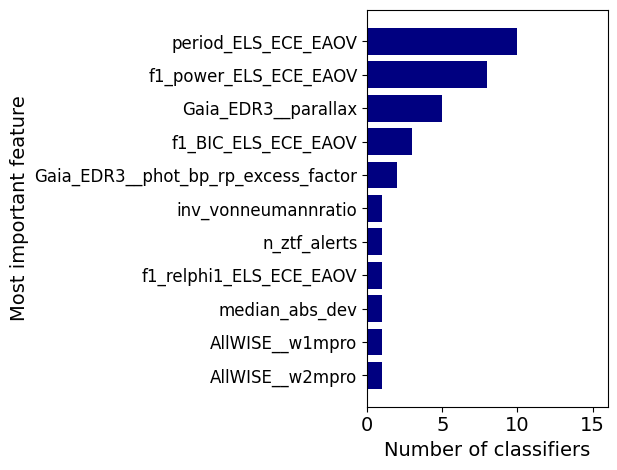

In [43]:
featfig = plt.figure()
plt.barh(names, frequencies, color='navy')
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.xlabel('Number of classifiers', fontsize=14)
plt.ylabel('Most important feature', fontsize=14)
plt.xlim(0,16)
plt.tight_layout()


In [44]:
topN = 3
most_important_features_all = []
for classif in classifications_subset:
    importance = feature_importances[classif]
    features = np.array([x for x in importance.keys()])
    f_scores = np.array([x for x in importance.values()])
    sorted_args = np.argsort(f_scores)[::-1]
    most_important_features = features[sorted_args[:topN]]
    most_important_features_all.append(most_important_features.tolist())

counter_all = Counter([x for y in most_important_features_all for x in y])
most_common_all = counter_all.most_common()[::-1]

names_all = [x[0] for x in most_common_all]
frequencies_all = [x[1] for x in most_common_all]

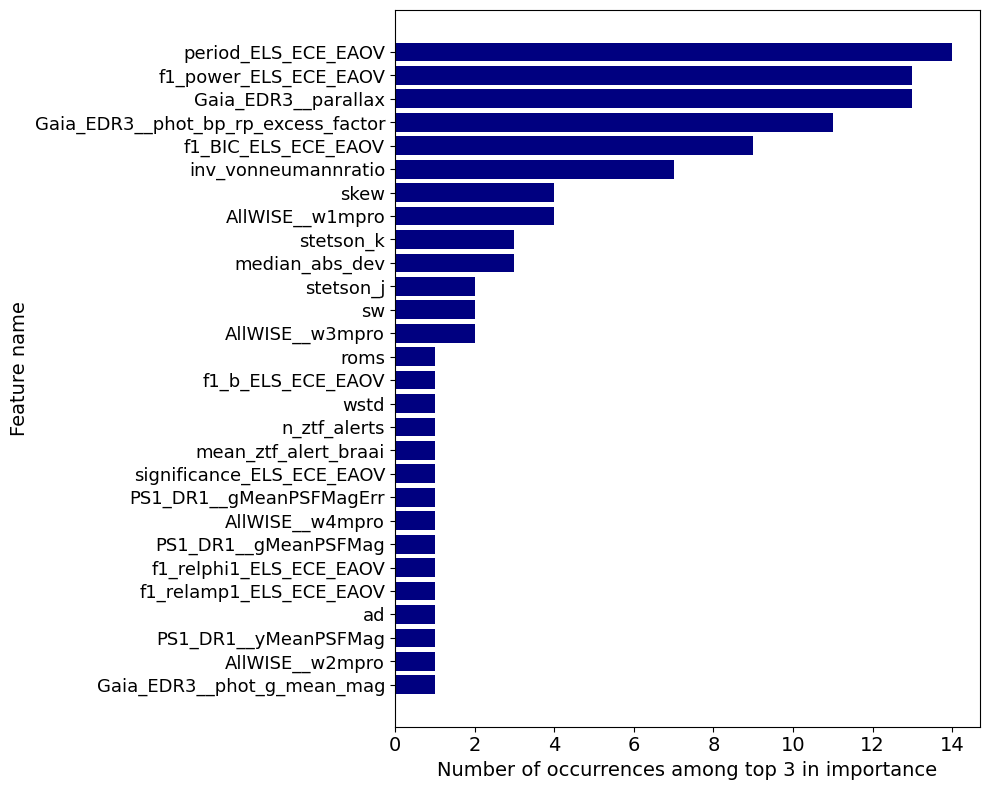

In [45]:
# Instead of counting the single most important feature,
# we count the top 3 for each classifier and plot them below:

featfig_all = plt.figure(figsize=(10, 8))

plt.barh(names_all, frequencies_all, color='navy')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel(f'Number of occurrences among top {topN} in importance', fontsize=14)
plt.ylabel('Feature name', fontsize=14)
plt.tight_layout()


In [46]:
# phenom classifiers only
phenom_classifications = ['blend', 'bogus', 'bright', 'dip', 'dp', 'e', 'ea', 'eb', 'el', 'ew', 'ext,'\
                          'fla', 'hp', 'i', 'longt', 'mp', 'pnp', 'saw', 'sin', 'vnv', 'wp']

topN = 3
most_important_features_phenom = []
for classif in classifications_subset:
    if classif in ['vnv', 'pnp', 'e', 'ew', 'i', 'fla', 'longt', 'eb', 'sin', 'ea', 'bogus', 'saw', 'blend', 'ext']:
        importance_phenom = feature_importances[classif]
        features_phenom = np.array([x for x in importance_phenom.keys()])
        f_scores_phenom = np.array([x for x in importance_phenom.values()])
        sorted_args_phenom = np.argsort(f_scores_phenom)[::-1]
        most_important_features = features_phenom[sorted_args_phenom[:topN]]
        most_important_features_phenom.append(most_important_features.tolist())

counter_phenom = Counter([x for y in most_important_features_phenom for x in y])
most_common_phenom = counter_phenom.most_common()[::-1]

names_phenom = [x[0] for x in most_common_phenom]
frequencies_phenom = [x[1] for x in most_common_phenom]

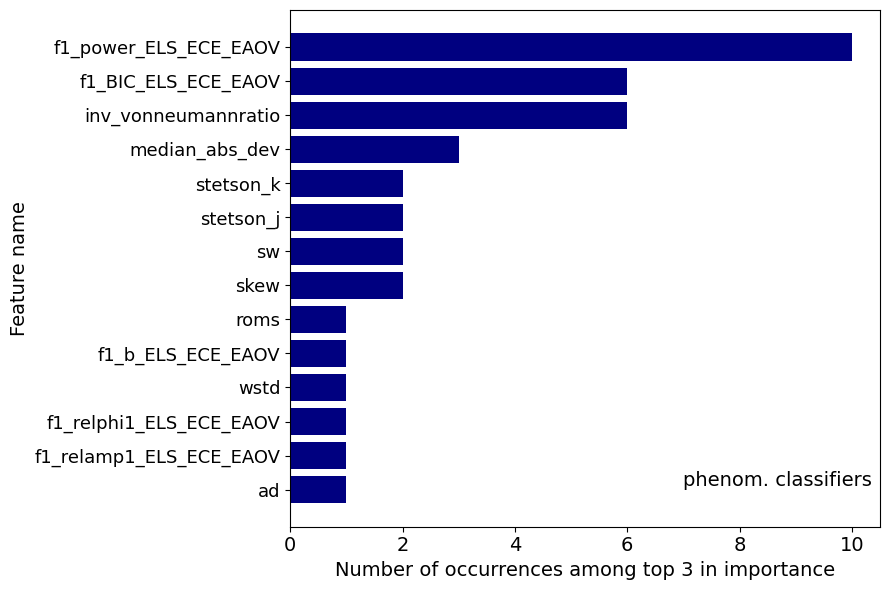

In [47]:
featfig_phenom = plt.figure(figsize=(9, 6))

plt.barh(names_phenom, frequencies_phenom, color='navy')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel(f'Number of occurrences among top {topN} in importance', fontsize=14)
plt.ylabel('Feature name', fontsize=14)
plt.text(7,0.1, 'phenom. classifiers', fontsize=14)
plt.tight_layout()


In [48]:
# ontol classifiers only
topN = 3
most_important_features_ontol = []
for classif in classifications_subset:
    if classif not in phenom_classifications:
        importance_ontol = feature_importances[classif]
        features_ontol = np.array([x for x in importance_ontol.keys()])
        f_scores_ontol = np.array([x for x in importance_ontol.values()])
        sorted_args_ontol = np.argsort(f_scores_ontol)[::-1]
        most_important_features = features_ontol[sorted_args_ontol[:topN]]
        most_important_features_ontol.append(most_important_features.tolist())

counter_ontol = Counter([x for y in most_important_features_ontol for x in y])
most_common_ontol = counter_ontol.most_common()[::-1]

names_ontol = [x[0] for x in most_common_ontol]
frequencies_ontol = [x[1] for x in most_common_ontol]

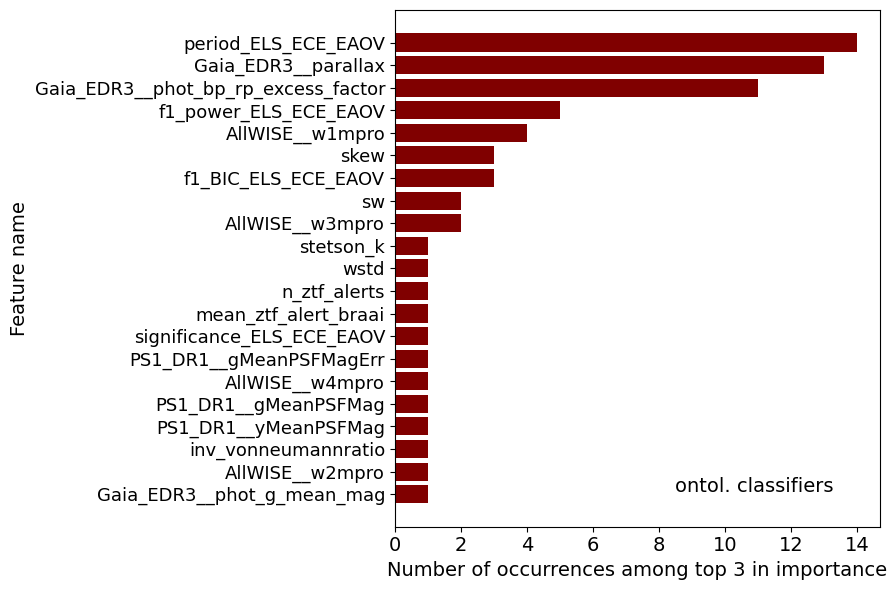

In [49]:
featfig_ontol = plt.figure(figsize=(9, 6))

plt.barh(names_ontol, frequencies_ontol, color='maroon')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel(f'Number of occurrences among top {topN} in importance', fontsize=14)
plt.ylabel('Feature name', fontsize=14)
plt.text(8.5,0.1, 'ontol. classifiers', fontsize=14)
plt.tight_layout()


In [50]:
description_dict={
    'ad': 'Anderson-Darling statistic',
    'chi2red': 'Reduced $\chi^{2}$ after mean subtraction',
    'f1_BIC': 'BIC of best-fitting Fourier series',
    'f1_a': '$a$ coefficient of best-fitting Fourier series',
    'f1_amp': 'Amplitude of best-fitting Fourier series',
    'f1_b': '$b$ coefficient of best-fitting Fourier series',
    'f1_phi0': 'Zero-phase, of best-fitting Fourier series',
    'f1_power': 'Normalized $\chi^{2}$ of best-fitting Fourier series',
    'f1_relamp1': 'Relative Fourier amplitude, first harmonic',
    'f1_relamp2': 'Relative Fourier amplitude, second harmonic',
    'f1_relamp3': 'Relative Fourier amplitude, third harmonic',
    'f1_relamp4': 'Relative Fourier amplitude, fourth harmonic',
    'f1_relphi1': 'Relative Fourier phase, first harmonic',
    'f1_relphi2': 'Relative Fourier phase, second harmonic',
    'f1_relphi3': 'Relative Fourier phase, third harmonic',
    'f1_relphi4': 'Relative Fourier phase, fourth harmonic',
    'i60r': 'Mag ratio between 20th, 80th percentiles',
    'i70r': 'Mag ratio between 15th, 85th percentiles',
    'i80r': 'Mag ratio between 10th, 90th percentiles',
    'i90r': 'Mag ratio between 5th, 95th percentiles',
    'inv_vonneumannratio': 'Inverse of Von Neumann ratio',
    'iqr': 'Mag ratio between 25th, 75th percentiles',
    'median': 'Median magnitude',
    'median_abs_dev': 'Median absolute deviation of magnitudes',
    'norm_excess_var': 'Normalized excess variance',
    'norm_peak_to_peak_amp': 'Normalized peak-to-peak amplitude',
    'roms': 'Robust median statistic',
    'skew': 'Skew of magnitudes',
    'smallkurt': 'Kurtosis of magnitudes',
    'stetson_j': 'Stetson $J$ coefficient',
    'stetson_k': 'Stetson $K$ coefficient',
    'sw': 'Shapiro-Wilk statistic',
    'welch_i': 'Welch $I$ statistic',
    'wmean': 'Weighted mean of magnitudes',
    'wstd': 'Weighted standard deviation of magnitudes',
    'dmdt': 'Magnitude-time histograms (26x26)',
    'mean_ztf_alert_braai': 'Mean significance of ZTF alerts, this source',
    'n_ztf_alerts': 'Number of ZTF alerts, this source',
    'period': 'Light curve period value',
    'significance': 'Significance of period',
    'AllWISE__w1mpro': 'AllWISE $W1$ mag',
    'AllWISE__w2mpro': 'AllWISE $W2$ mag',
    'AllWISE__w3mpro': 'AllWISE $W3$ mag',
    'AllWISE__w4mpro': 'AllWISE $W4$ mag',
    'AllWISE__w1sigmpro': 'AllWISE $W1$ mag error',
    'AllWISE__w2sigmpro': 'AllWISE $W2$ mag error',
    'Gaia_EDR3__parallax': 'Gaia parallax',
    'Gaia_EDR3__parallax_error': 'Gaia parallax error',
    'Gaia_EDR3__phot_bp_mean_mag': 'Gaia $BP$ mag',
    'Gaia_EDR3__phot_rp_mean_mag': 'Gaia $RP$ mag',
    'Gaia_EDR3__phot_g_mean_mag': 'Gaia $G$ mag',
    'Gaia_EDR3__phot_bp_rp_excess_factor': 'Gaia $BP-RP$ excess factor',
    'PS1_DR1__gMeanPSFMag': 'PS1 $g$ mag',
    'PS1_DR1__rMeanPSFMag': 'PS1 $r$ mag',
    'PS1_DR1__iMeanPSFMag': 'PS1 $i$ mag',
    'PS1_DR1__zMeanPSFMag': 'PS1 $z$ mag',
    'PS1_DR1__yMeanPSFMag': 'PS1 $y$ mag',
    'PS1_DR1__gMeanPSFMagErr': 'PS1 $g$ mag error',
    'PS1_DR1__rMeanPSFMagErr': 'PS1 $r$ mag error',
    'PS1_DR1__iMeanPSFMagErr': 'PS1 $i$ mag error',
    'PS1_DR1__zMeanPSFMagErr': 'PS1 $z$ mag error',
    'PS1_DR1__yMeanPSFMagErr': 'PS1 $y$ mag error',
}

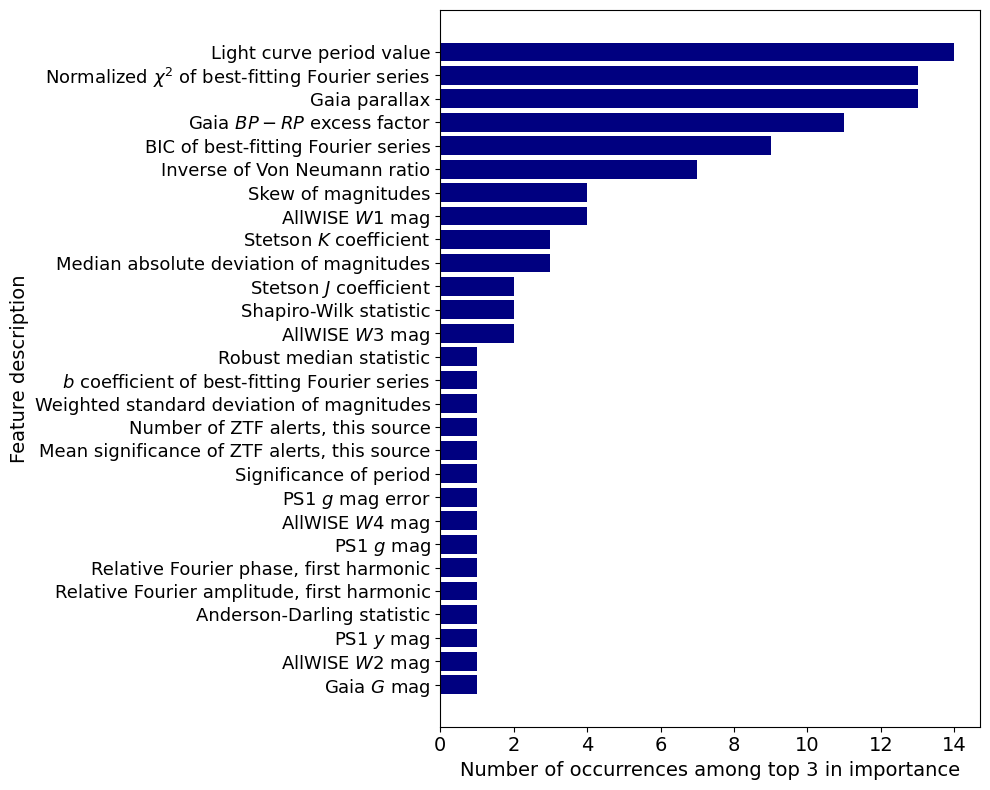

In [51]:
# Map feature names to descriptions 
featfig_all = plt.figure(figsize=(10, 8))

descriptions_all = [description_dict[x.removesuffix('_ELS_ECE_EAOV')] for x in names_all]

plt.barh(descriptions_all, frequencies_all, color='navy')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel(f'Number of occurrences among top {topN} in importance', fontsize=14)
plt.ylabel('Feature description', fontsize=14)
plt.tight_layout()

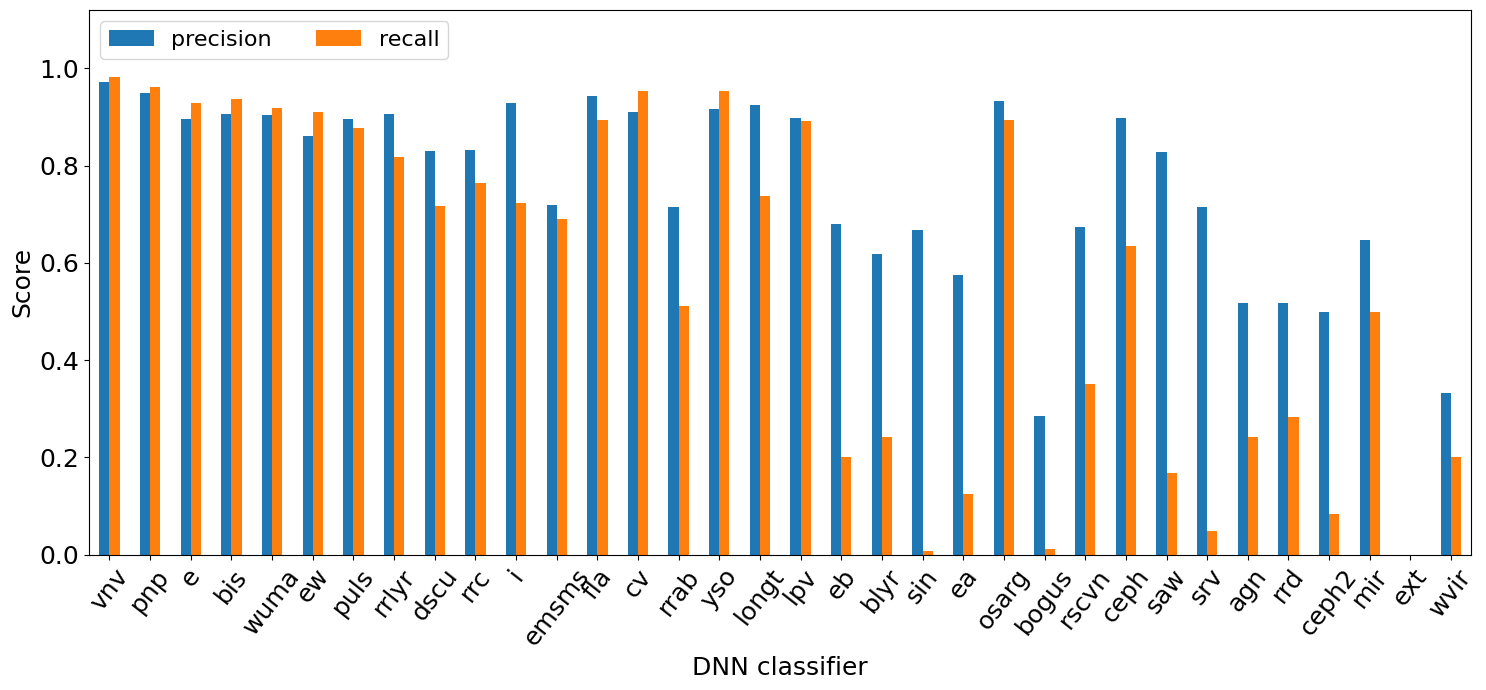

In [52]:
#dnn precision and recall plot
dnnPrecRecFig = plt.figure(figsize=(15,7))
ax = dnnPrecRecFig.add_subplot()
resultsTable[['precision_dnn', 'recall_dnn']].rename({'precision_dnn':'precision', 'recall_dnn':'recall'}, axis=1).plot.bar(figsize = (15,7), ax=ax)

plt.xticks(rotation = 52, fontsize = 18)
plt.legend(ncol=2, loc=2, fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('DNN classifier',fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.ylim(0,1.12)
plt.tight_layout()


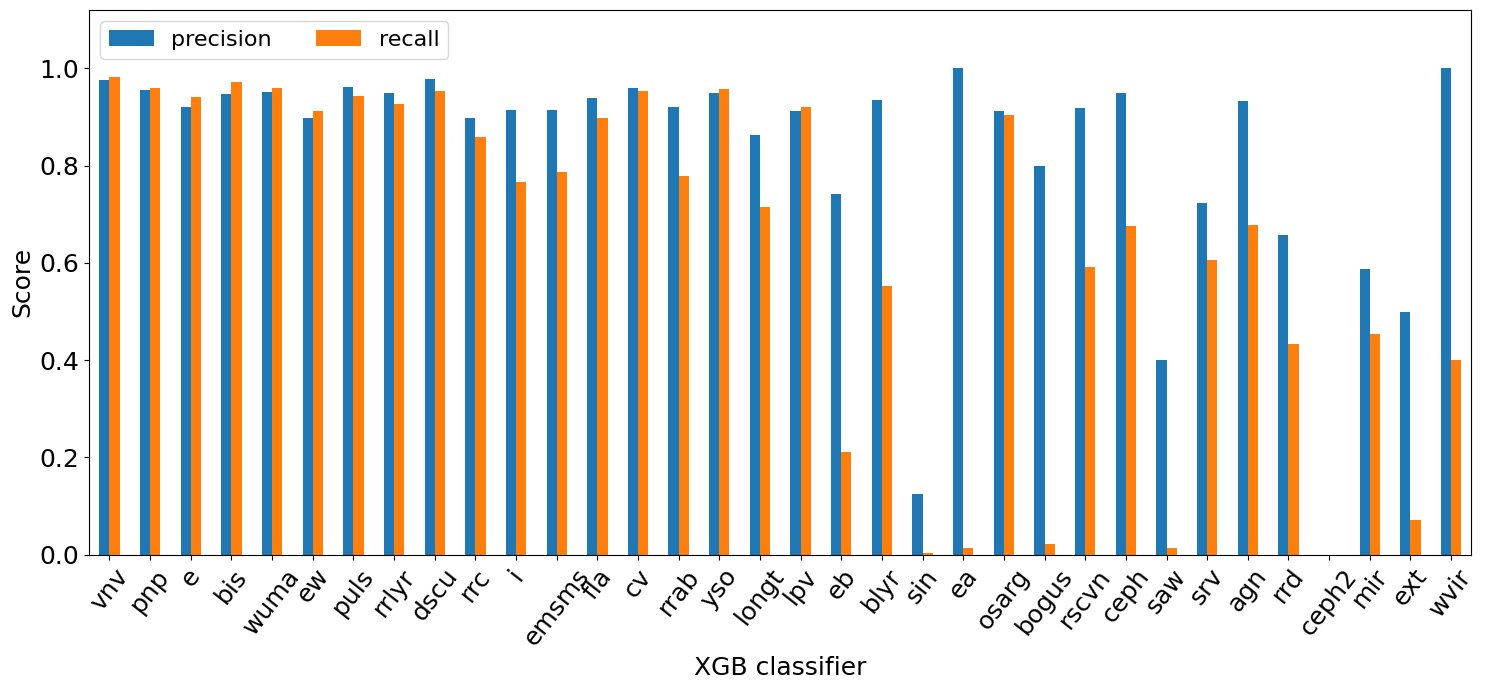

In [53]:
#xgb precision and recall plot
xgbPrecRecFig = plt.figure(figsize=(15,7))
ax = xgbPrecRecFig.add_subplot()
resultsTable[['precision_xgb', 'recall_xgb']].rename({'precision_xgb':'precision', 'recall_xgb':'recall'}, axis=1).plot.bar(figsize = (15,7), ax=ax)

plt.xticks(rotation = 52, fontsize = 18)
plt.legend(ncol=2, loc=2, fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('XGB classifier',fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.ylim(0,1.12)
plt.tight_layout()


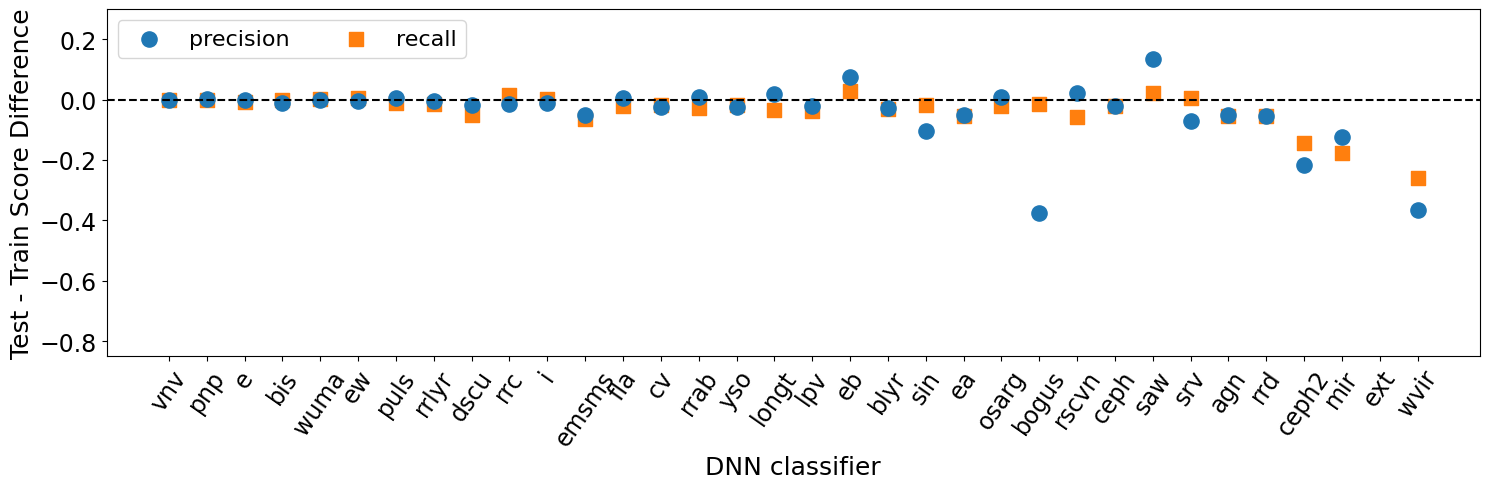

In [54]:
# Plot difference between DNN test and training precision/recall scores
dnnDiffFig = plt.figure(figsize=(15,5))

for cls in resultsTable.index:
    train_precision = resultsTable_train.loc[cls, 'precision_dnn']
    train_recall = resultsTable_train.loc[cls, 'recall_dnn']
    test_precision = resultsTable.loc[cls, 'precision_dnn']
    test_recall = resultsTable.loc[cls, 'recall_dnn']
        
    if cls == resultsTable.index[-1]:
        break
        
    elif not (np.isnan(train_precision) | (np.isnan(train_recall)) | (np.isnan(test_precision)) | (np.isnan(test_recall))):
        plt.scatter(cls, test_precision - train_precision, color=colors[0], s=120, zorder=1)
        plt.scatter(cls, test_recall - train_recall, color=colors[1], s=100, marker='s', zorder=0)
    else:
        plt.scatter(cls, 999)
    
if not (np.isnan(train_precision) | (np.isnan(train_recall)) | (np.isnan(test_precision)) | (np.isnan(test_recall))):
    plt.scatter(cls, test_precision - train_precision, color=colors[0], label='precision', s=120, zorder=1)
    plt.scatter(cls, test_recall - train_recall, color=colors[1], label='recall', s=100, marker='s', zorder=0)
else:
    plt.scatter(cls, 999, color=colors[0], label='precision', s=120, zorder=1)
    plt.scatter(cls, 999, color=colors[1], label='recall', s=120, zorder=0)
    
plt.xticks(rotation = 55, fontsize = 17)
plt.legend(ncol=2, loc=2, fontsize = 16)
plt.yticks(fontsize = 17)
plt.xlabel('DNN classifier',fontsize=18)
plt.ylabel('Test - Train Score Difference', fontsize=18)
plt.axhline(0, color='black', linestyle='--')
plt.ylim(-0.85, 0.3)
plt.tight_layout()


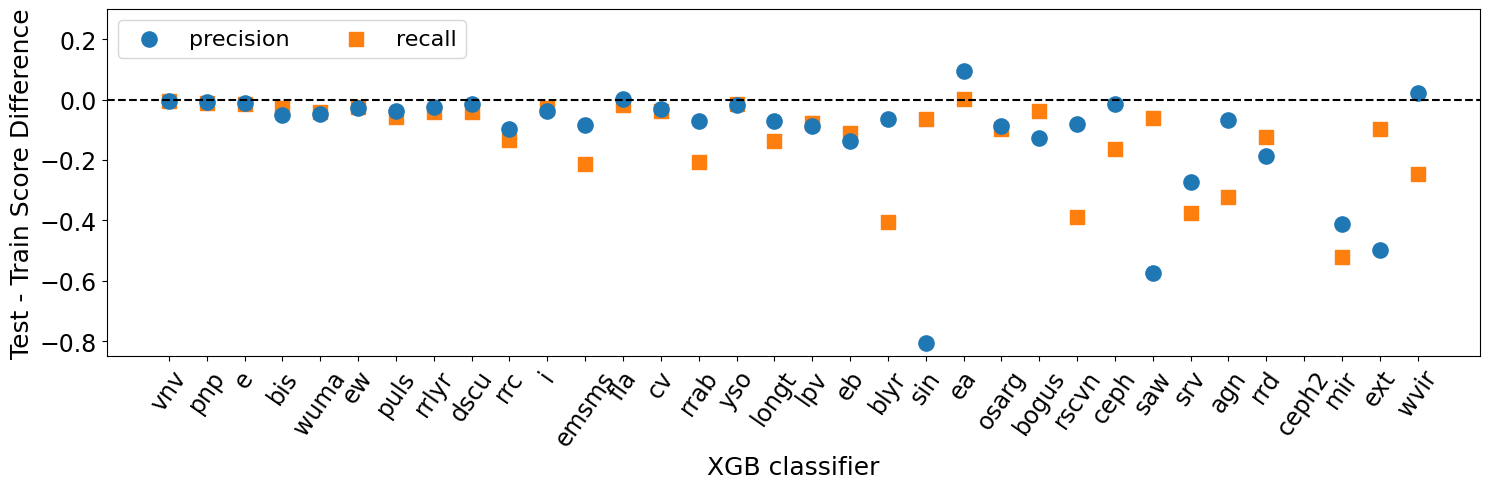

In [55]:
# Plot difference between XGB test and training precision/recall scores
xgbDiffFig = plt.figure(figsize=(15,5))

for cls in resultsTable.index:
    train_precision = resultsTable_train.loc[cls, 'precision_xgb']
    train_recall = resultsTable_train.loc[cls, 'recall_xgb']
    test_precision = resultsTable.loc[cls, 'precision_xgb']
    test_recall = resultsTable.loc[cls, 'recall_xgb']
    
    if cls == resultsTable.index[-1]:
        break
        
    elif not (np.isnan(train_precision) | (np.isnan(train_recall)) | (np.isnan(test_precision)) | (np.isnan(test_recall))):
        plt.scatter(cls, test_precision - train_precision, color=colors[0], s=120, zorder=1)
        plt.scatter(cls, test_recall - train_recall, color=colors[1], s=100, marker='s', zorder=0)
    else:
        plt.scatter(cls, 999)
    
if not (np.isnan(train_precision) | (np.isnan(train_recall)) | (np.isnan(test_precision)) | (np.isnan(test_recall))):
    plt.scatter(cls, test_precision - train_precision, color=colors[0], label='precision', s=120, zorder=1)
    plt.scatter(cls, test_recall - train_recall, color=colors[1], label='recall', s=100, marker='s', zorder=0)
else:
    plt.scatter(cls, 999, color=colors[0], label='precision', s=120, zorder=1)
    plt.scatter(cls, 999, color=colors[1], label='recall', s=120, zorder=0)

plt.xticks(rotation = 55, fontsize = 17)
plt.legend(ncol=2, loc=2, fontsize = 16)
plt.yticks(fontsize = 17)
plt.xlabel('XGB classifier',fontsize=18)
plt.ylabel('Test - Train Score Difference', fontsize=18)
plt.axhline(0, color='black', linestyle='--')
plt.ylim(-0.85, 0.3)
plt.tight_layout()


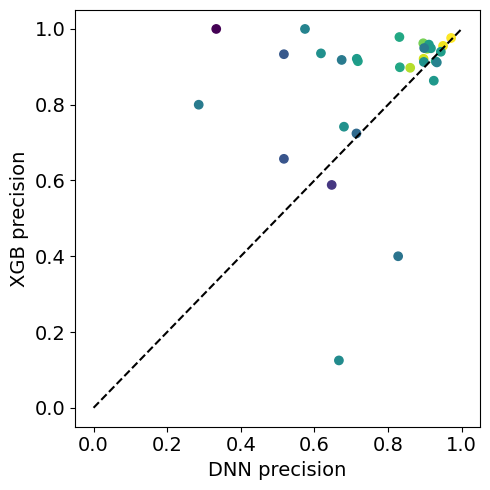

In [56]:
# Scatter plot of DNN/XGB precision, color-coded by number of positive examples
# Intended to be paired with the recall scatter plot below
pscatter_count = plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.scatter(mrg_prec_rec['precision_dnn'], mrg_prec_rec['precision_xgb'], c=np.log10(mrg_prec_rec['count']))
plt.xlabel('DNN precision',fontsize=14)
plt.ylabel('XGB precision',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()


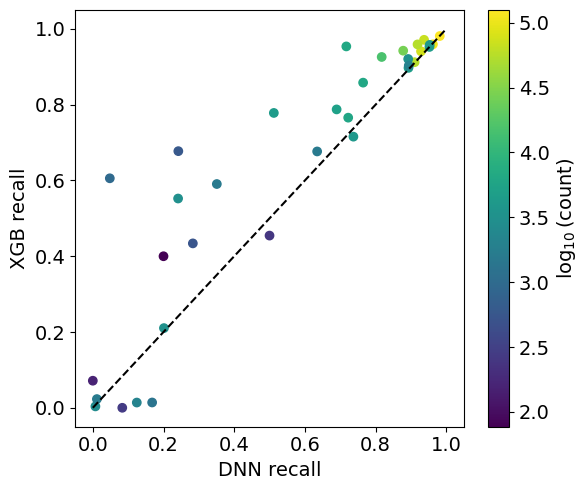

In [57]:
# Scatter plot of DNN/XGB recall, color-coded by number of positive examples (with colorbar)
rscatter_count = plt.figure(figsize=(6,5))
plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.scatter(mrg_prec_rec['recall_dnn'], mrg_prec_rec['recall_xgb'], c=np.log10(mrg_prec_rec['count']))
cbar = plt.colorbar(label='log(count)')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$\log_{10}$(count)', size=14)
plt.xlabel('DNN recall',fontsize=14)
plt.ylabel('XGB recall',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()


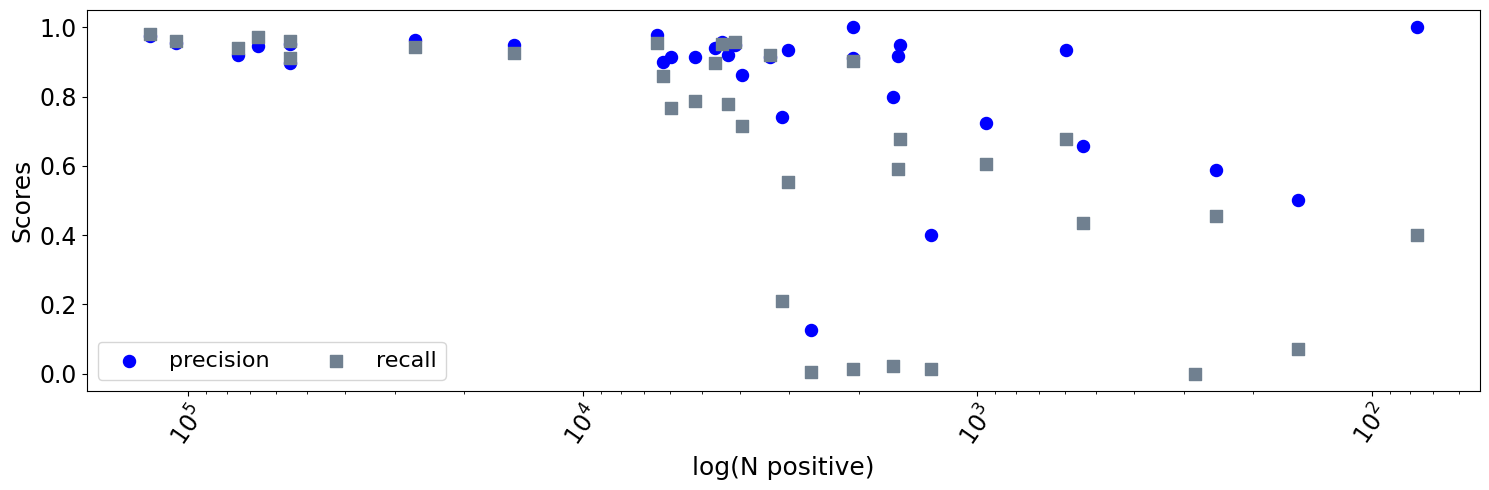

In [58]:
# Number of positive examples given to each XGB classifier vs precision and recall scores
countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.scatter(x = 'count', y = 'precision_xgb', figsize = (15,5), label='precision', s=75, ax=ax, color='blue')
resultsTable.reset_index().plot.scatter(x = 'count', y = 'recall_xgb', figsize = (15,5), label='recall', s=75, marker='s', ax=ax, color='slategray')

plt.legend(ncol=2, loc=3, fontsize = 16)
plt.ylabel('Scores', fontsize=18)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('log(N positive)', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()

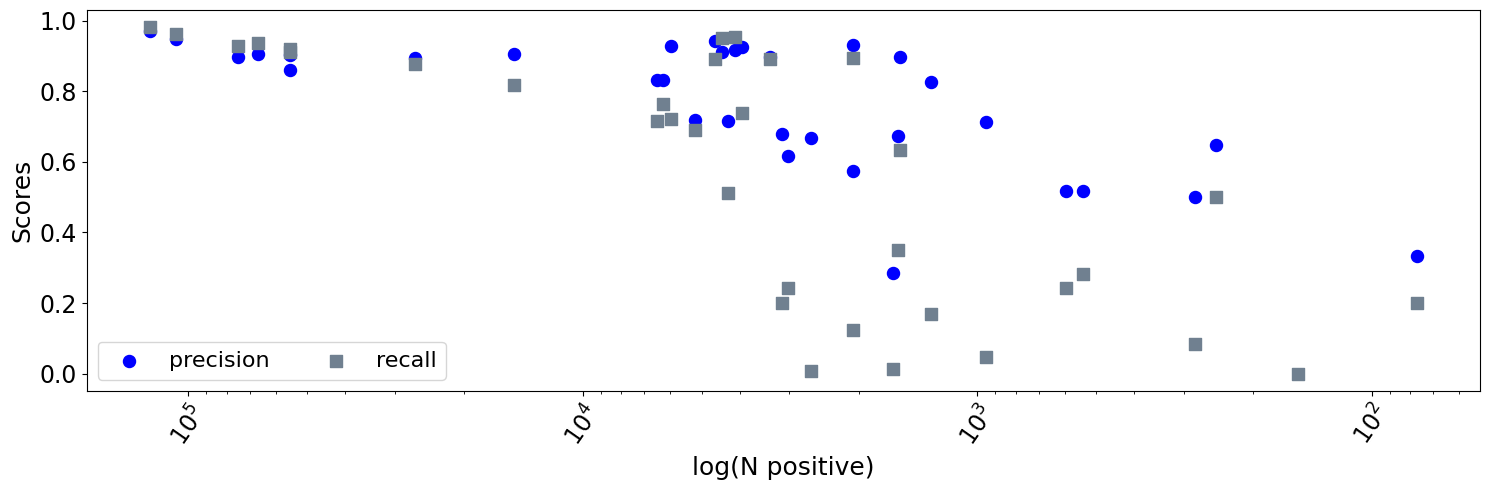

In [59]:
# Number of positive examples given to each DNN classifier vs precision and recall scores
countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.scatter(x = 'count', y = 'precision_dnn', figsize = (15,5), label='precision', s=75, ax=ax, color='blue')
resultsTable.reset_index().plot.scatter(x = 'count', y = 'recall_dnn', figsize = (15,5), label='recall', s=75, marker='s', ax=ax, color='slategray')

plt.legend(ncol=2, loc=3, fontsize = 16)
plt.ylabel('Scores', fontsize=18)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('log(N positive)', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()

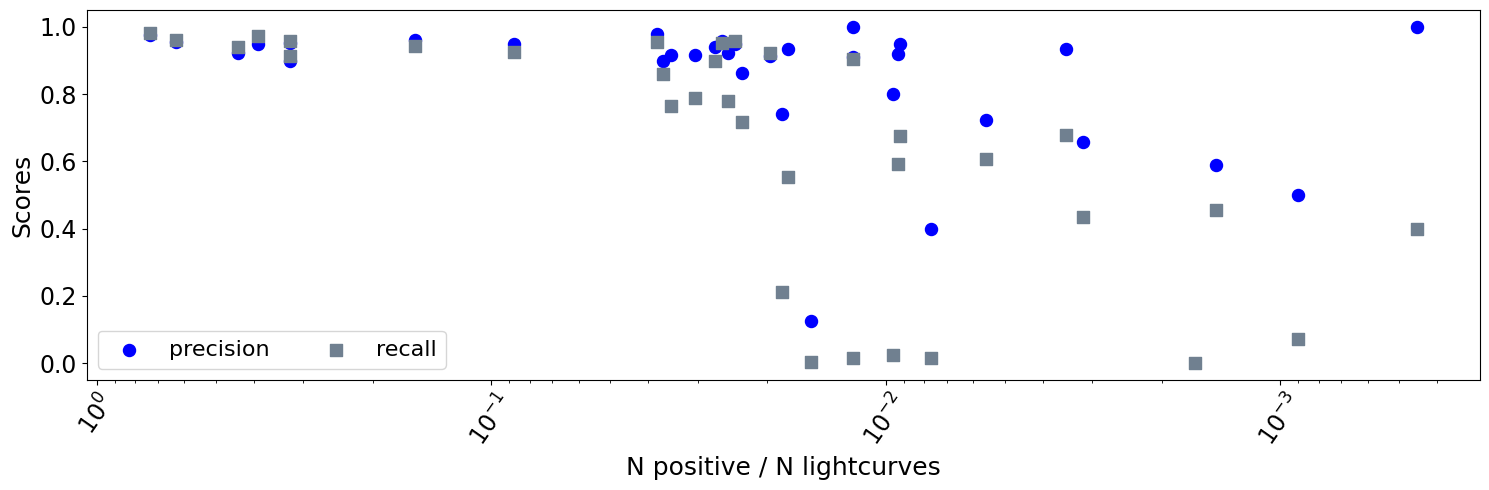

In [60]:
#fraction of positive examples vs XGB precision and recall scores
resultsTable['fraction'] = resultsTable['count']/n_lightcurves

countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.scatter(x = 'fraction', y = 'precision_xgb', figsize = (15,5), label='precision', s=75, ax=ax, color='blue')
resultsTable.reset_index().plot.scatter(x = 'fraction', y = 'recall_xgb', figsize = (15,5), label='recall', s=75, marker='s', ax=ax, color='slategray')

plt.legend(ncol=2, loc=3, fontsize = 16)
plt.ylabel('Scores', fontsize=18)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('N positive / N lightcurves', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()

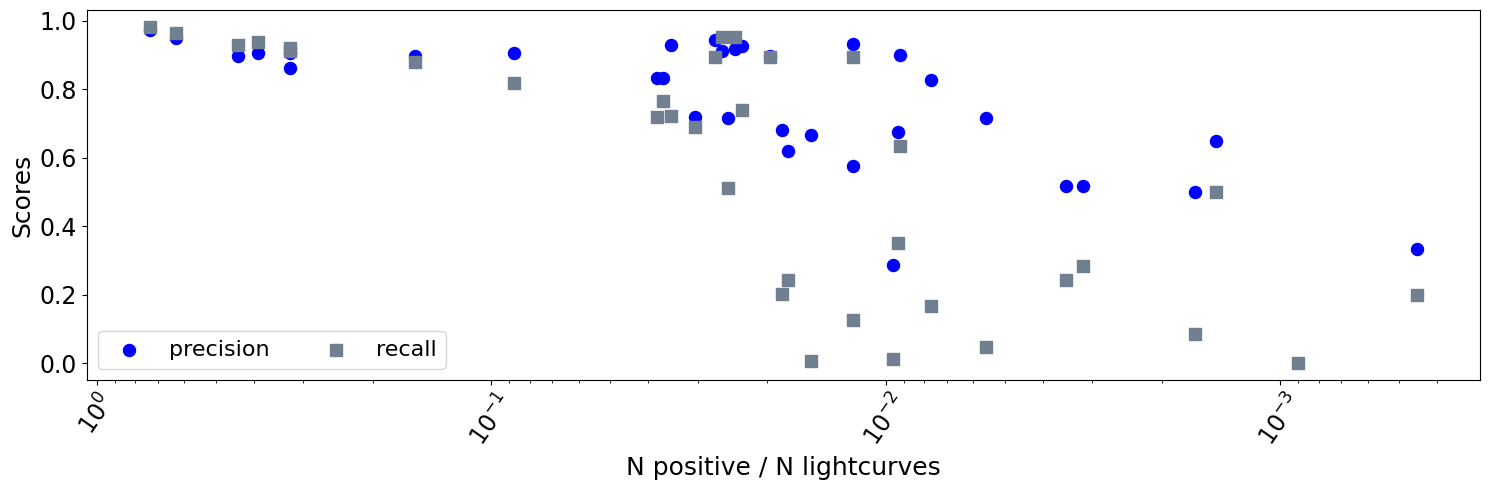

In [61]:
#fraction of positive examples vs DNN precision and recall scores
resultsTable['fraction'] = resultsTable['count']/n_lightcurves

countFig = plt.figure(figsize=(15,5))
ax = countFig.add_subplot()
resultsTable.reset_index().plot.scatter(x = 'fraction', y = 'precision_dnn', figsize = (15,5), label='precision', s=75, ax=ax, color='blue')
resultsTable.reset_index().plot.scatter(x = 'fraction', y = 'recall_dnn', figsize = (15,5), label='recall', s=75, marker='s', ax=ax, color='slategray')

plt.legend(ncol=2, loc=3, fontsize = 16)
plt.ylabel('Scores', fontsize=18)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('N positive / N lightcurves', fontsize=18)
plt.xticks(rotation = 55, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()